In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import plotly.graph_objects as go
sns.set()

c:\Users\leand\miniconda3\envs\datascience\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
compañias = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
symbol = compañias[0]
symbol = symbol['Symbol']

### <font color='blue'>**S&P 500**</font>                                                        
Es uno de los índices bursátiles más representativos de la economía estadounidense. 

Su origen data de 1923, cuando Standard & Poor's intrujo un índice que cubría a 233 compañías. Luego, en 1957, se extendió a la forma en que lo conocemos hoy.

Compuesto por 500 de las empresas que cotizan en NYSE y NASDAQ. 

Estas empresas abarcan el prácticamente el 80% de todo el mercado de valores de EE.UU.

Para que una empresa pueda formar parte tiene que ser seleccionada por el comité del S&P global. Este comité se basa en 8 criterios, a saber:

+ Capitalización bursátil
+ Liquidez
+ Domicilio
+ Capital flotante
+ Viabilidad financiera
+ Años de cotización
+ Volumen de acciones negociadas


In [3]:
'Reemplazamos para poder contar con todas las compañías'

lista_symbol = [c.replace('.', '-') for c in symbol]

In [4]:
'Cargamos con los datos que abarcan el periodo 2000-2021'

df_list = list()
for ticker in lista_symbol:
    data = yf.download(ticker, group_by= 'Ticker', start = '2000-01-01', end = '2021-12-31')
    data['Ticker'] = ticker 
    data['Return_gap'] = np.log(data['Open']/data['Close'].shift(1)).fillna(0)
    df_list.append(data)

df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [37]:
'Exportamos a un archivo parquet con compresión Snappy'

# df.to_parquet('df.parquet') #, compression= 'snappy')

In [4]:
'Cargamos el dataset'

data = pd.read_parquet('df.parquet')

In [5]:
'Creamos una columna para la fecha'

data['Date'] = data.index

In [6]:
'Creamos una columna para el día de la semana'

data['Day'] = data['Date'].dt.day_name() 

In [7]:
data

,Open,High,Low,Close,Adj Close,Volume,Ticker,Return_gap,Date,Day
Date,,,,,,,,,,
2000-01-03,48.031250,48.250000,47.031250,47.187500,26.434858,2173400.0,MMM,0.000000,2000-01-03,Monday
2000-01-04,46.437500,47.406250,45.312500,45.312500,25.384466,2713800.0,MMM,-0.016022,2000-01-04,Tuesday
2000-01-05,45.562500,48.125000,45.562500,46.625000,26.119736,3699400.0,MMM,0.005502,2000-01-05,Wednesday
2000-01-06,47.156250,51.250000,47.156250,50.375000,28.220531,5975800.0,MMM,0.011330,2000-01-06,Thursday
2000-01-07,50.562500,51.906250,49.968750,51.375000,28.780727,4101200.0,MMM,0.003715,2000-01-07,Friday
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,241.699997,244.389999,240.690002,242.509995,241.697968,1172400.0,ZTS,0.000538,2021-12-23,Thursday
2021-12-27,244.389999,246.720001,243.080002,246.509995,245.684570,807000.0,ZTS,0.007722,2021-12-27,Monday
2021-12-28,247.000000,247.839996,243.639999,244.250000,243.432159,1004400.0,ZTS,0.001986,2021-12-28,Tuesday


In [8]:
'Reordenamos las columnas'

data = data.reindex(['Ticker', 'Date', 'Day', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Return_gap'], axis = 'columns')

In [9]:
data.reset_index(drop = True, inplace = True)

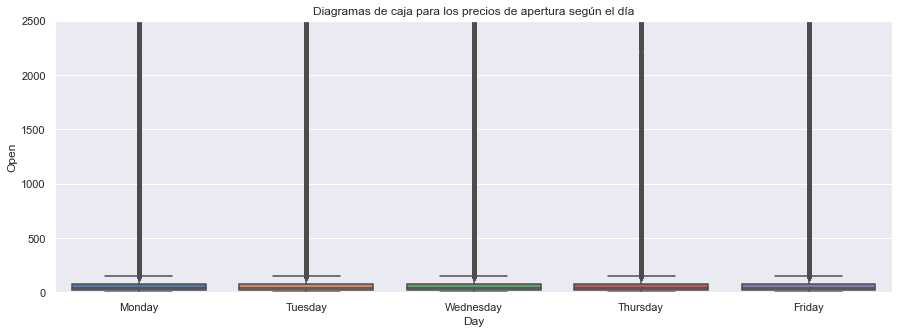

In [10]:
plt.figure(figsize=(15, 5))

sns.boxplot(x = data.Day, y = data.Open)
plt.title('Diagramas de caja para los precios de apertura según el día')
plt.ylim([0,2500])
plt.show()

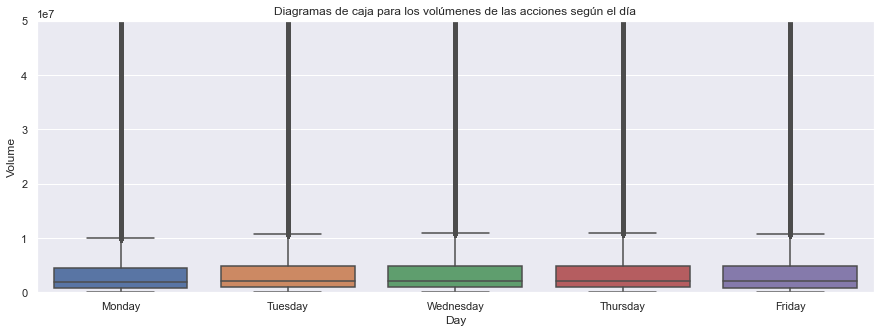

In [12]:
plt.figure(figsize=(15, 5))

sns.boxplot( x = 'Day', y= 'Volume', data= data)
plt.ylim([0,50000000])
plt.title('Diagramas de caja para los volúmenes de las acciones según el día')
plt.show()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478162 entries, 0 to 2478161
Data columns (total 10 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Ticker      object        
 1   Date        datetime64[ns]
 2   Day         object        
 3   Open        float64       
 4   High        float64       
 5   Low         float64       
 6   Close       float64       
 7   Adj Close   float64       
 8   Volume      float64       
 9   Return_gap  float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 189.1+ MB


### *1) Cuál es el mejor día para invertir, teniendo en cuenta el retorno de los movimiento gap*

In [14]:
gap = data.groupby('Day').mean()
gap

,Open,High,Low,Close,Adj Close,Volume,Return_gap
Day,,,,,,,
Friday,69.812106,70.578699,69.000604,69.823256,61.584802,6.224375e+06,0.000222
Monday,70.059196,70.843901,69.234033,70.048704,61.847504,5.777623e+06,0.000041
Thursday,70.059253,70.899329,69.228545,70.101825,61.881563,6.347015e+06,0.000057
Tuesday,70.119309,70.916968,69.298505,70.118692,61.907802,6.140266e+06,0.000578
Wednesday,69.936921,70.758715,69.107471,69.950017,61.727199,6.329557e+06,0.000116


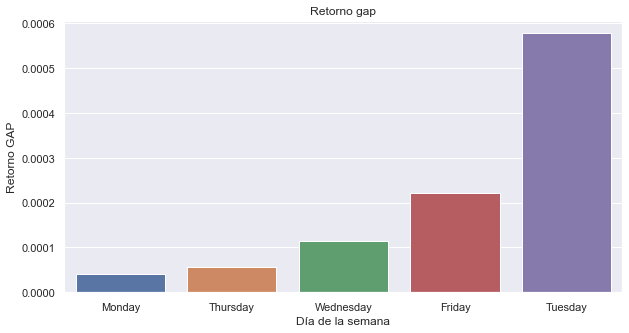

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(x = gap.index, y= 'Return_gap', data= gap, order = gap.sort_values('Return_gap').index)
plt.title('Retorno gap')
plt.xlabel('Día de la semana')
plt.ylabel('Retorno GAP')
plt.show()

***El mejor día para invertir es el martes, considerando los movimientos gap***

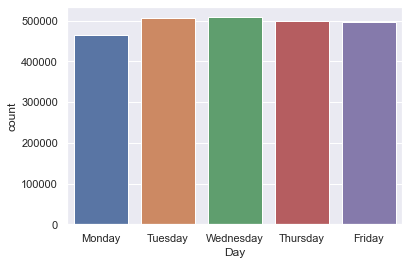

In [16]:
'Obsevamos que en nuestro dataset los atributos días están balanceados'

sns.countplot(x = 'Day', data = data)
plt.show()

### *2) ¿Cuál es el mejor día para invertir, teniendo en cuenta el retorno de los movimientos intradiarios?*

In [17]:
'Creamos una nueva columna aplicando la fórmula'

data['retornos_intra'] = np.log(data['Close']/data['Open']).fillna(0)

In [18]:
'Agrupamos por días de la semana'

data.groupby('Day').mean()

,Open,High,Low,Close,Adj Close,Volume,Return_gap,retornos_intra
Day,,,,,,,,
Friday,69.812106,70.578699,69.000604,69.823256,61.584802,6.224375e+06,0.000222,0.000250
Monday,70.059196,70.843901,69.234033,70.048704,61.847504,5.777623e+06,0.000041,-0.000307
Thursday,70.059253,70.899329,69.228545,70.101825,61.881563,6.347015e+06,0.000057,0.000520
Tuesday,70.119309,70.916968,69.298505,70.118692,61.907802,6.140266e+06,0.000578,0.000187
Wednesday,69.936921,70.758715,69.107471,69.950017,61.727199,6.329557e+06,0.000116,0.000239


In [19]:
'Procedemos a realizar los pasos necesarios para graficar'

retornos_intra = data.groupby('Day').mean()
retornos_intra = retornos_intra.reset_index()
retornos_intra.rename(columns = {0: 'intradiario'}, inplace = True)
retornos_intra = retornos_intra[['Day','retornos_intra']]

In [20]:
retornos_intra

,Day,retornos_intra
0,Friday,0.000250
1,Monday,-0.000307
2,Thursday,0.000520
3,Tuesday,0.000187
4,Wednesday,0.000239


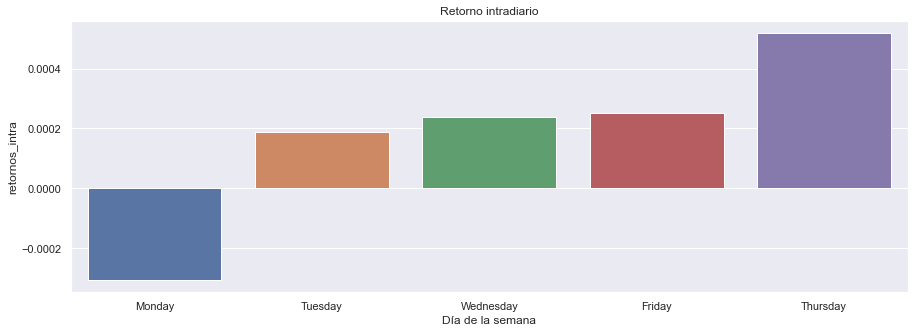

In [21]:
plt.figure(figsize=(15, 5))
sns.barplot(x = 'Day', y= 'retornos_intra', data= retornos_intra, order = retornos_intra.sort_values('retornos_intra').Day)
plt.title('Retorno intradiario')
plt.xlabel('Día de la semana')
sns.set()
plt.show()

***El mejor día para invertir es el jueves, considerando el retorno de los movimientos intradiarios***

### *3) ¿Cuáles son las mejores industrias que pertenecen al SP500 en las cuales se puede invertir?*

In [22]:
industrias = pd.read_csv('S&P500-Info.csv')

In [23]:
industrias['GICS Sector'].value_counts()

Information Technology    74
Industrials               73
Financials                66
Health Care               64
Consumer Discretionary    58
Consumer Staples          33
Real Estate               31
Utilities                 29
Materials                 28
Communication Services    26
Energy                    21
Name: GICS Sector, dtype: int64

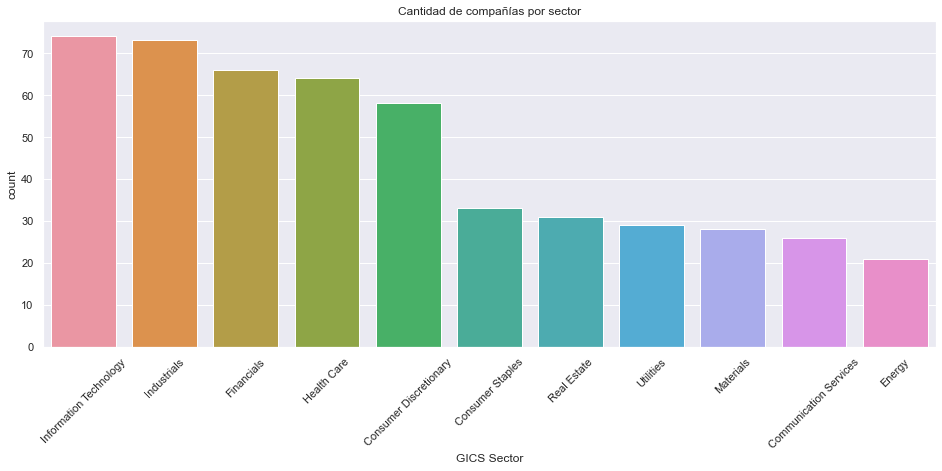

In [24]:
plt.figure(figsize=(16, 6))
sns.countplot(x = 'GICS Sector', data= industrias, order = industrias['GICS Sector'].value_counts().index)
plt.title('Cantidad de compañías por sector')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
'Trabajamos con los útlimos 2 años'

df_lista = list()
for ticker in lista_symbol:
    data_2022 = yf.download(ticker, group_by="Ticker", start = '2020-01-01', end = '2022-06-28')
    data_2022['ticker'] = ticker  
    df_lista.append(data_2022)


df_2022 = pd.concat(df_lista)

In [25]:
df_2022 = pd.read_parquet('data_2022')

In [26]:
df_2022.rename(columns= {'ticker': 'Symbol'}, inplace = True)
df_2022['Date'] = df_2022.index
df_2022_industrias = industrias[['Symbol', 'GICS Sector']].merge(df_2022, how='inner', on='Symbol')
df_2022_industrias.set_index('Date', inplace = True)

In [27]:
df_2022_industrias

,Symbol,GICS Sector,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,
2020-01-02,MMM,Industrials,177.679993,180.009995,177.139999,180.000000,164.922287,3601700.0
2020-01-03,MMM,Industrials,177.020004,178.660004,175.630005,178.449997,163.502136,2466900.0
2020-01-06,MMM,Industrials,177.149994,178.710007,176.350006,178.619995,163.657898,1998000.0
2020-01-07,MMM,Industrials,178.279999,178.509995,176.820007,177.899994,162.998184,2173000.0
2020-01-08,MMM,Industrials,178.000000,181.500000,177.649994,180.630005,165.499542,2758300.0
...,...,...,...,...,...,...,...,...
2022-06-21,ZTS,Health Care,160.270004,162.770004,160.160004,162.009995,162.009995,2080200.0
2022-06-22,ZTS,Health Care,161.179993,166.270004,161.089996,164.210007,164.210007,2137700.0
2022-06-23,ZTS,Health Care,166.020004,169.380005,165.589996,169.169998,169.169998,1535600.0


### Aquí nos quedamos con el sector 'Industrials' y el año 2022

In [28]:
df_industrials = df_2022_industrias[df_2022_industrias['GICS Sector'] == 'Industrials']
df_industrials = df_industrials[df_industrials.index.year == 2022]

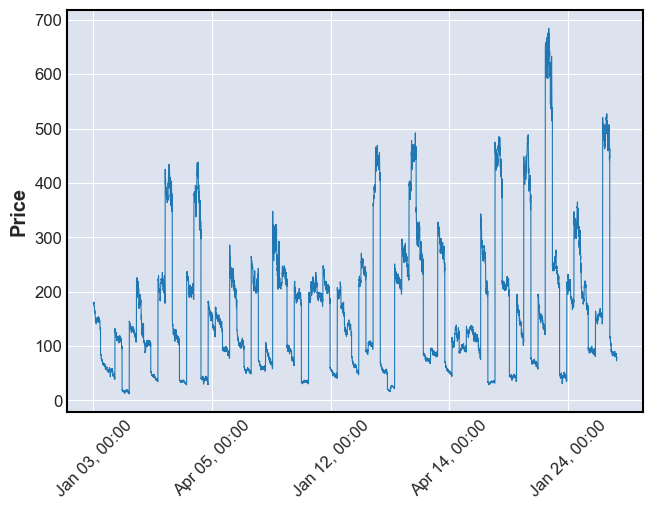

In [29]:
mpf.plot(df_industrials, type = 'line')

### Realizamos lo mismo para el sector 'Information'

In [30]:
df_information = df_2022_industrias[df_2022_industrias['GICS Sector'] == 'Information Technology']
df_information = df_information[df_information.index.year == 2022]

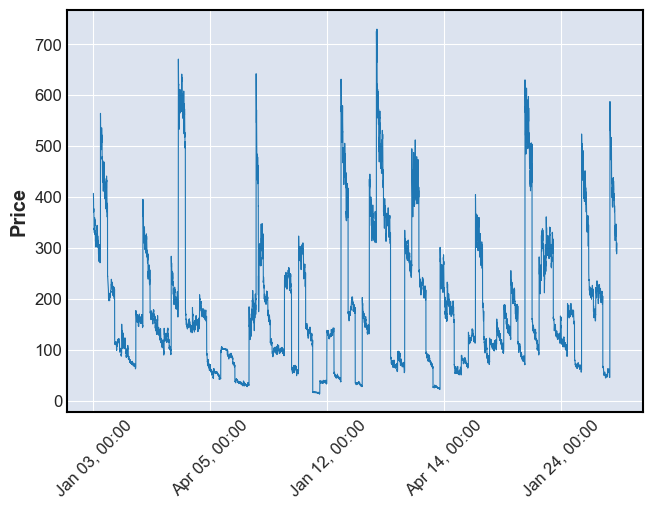

In [31]:
mpf.plot(df_information,type = 'line')

### En esta ocasión, tomamos el sector 'Financials'

In [32]:
df_financials = df_2022_industrias[df_2022_industrias['GICS Sector'] == 'Financials']
df_financials = df_financials[df_financials.index.year == 2022]

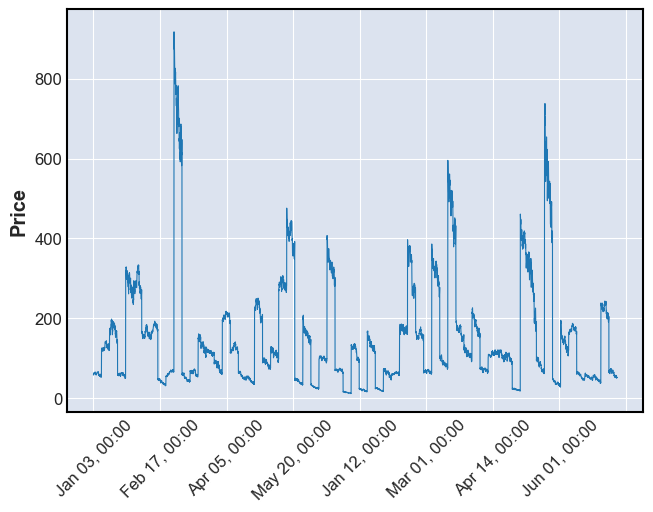

In [33]:
mpf.plot(df_financials, type = 'line')

### *4) ¿Cuáles fueron los momentos de alta volatilidad que afectaron al SP500?*

### <font color='blue'>**VIX**</font> 

Conocido comúnmente como índice de sentimiento del inversor o índice del miedo.

El VIX mide la volatilidad del mayor índice bursátil estadounidense, el S&P, que incluye 500 empresas, lo que lo convierte en un índice psicológico.

En los mercados, la volatilidad representa confianza o miedo. 

    ▶ Cuando el VIX tiende a 0, refleja un sentimiento de confianza de los inversores en la economía estadounidense. 

    ▶ Cuando el VIX tiende a 100, refleja pesimismo o miedo por parte de estos mismos inversores. 



Hay tres niveles de alcance en el índice VIX : 

+ Entre 0 y 20: hay poca volatilidad en el mercado, los inversores tienen confianza y el S&P500 está en principio en tendencia alcista. 

+ Entre 20 y 30: los inversores empiezan a preocuparse, lo que conduce a la volatilidad, la tendencia al alza del SP500 puede continuar pero también comenzar a revertirse. 

+ Entre 30 y 100: ¡es el pánico por parte de los inversores! La volatilidad es particularmente alta y probablemente estamos asistiendo a una fuerte corrección o incluso a un colapso de los precios del SP500 y de los principales índices bursátiles. 

In [34]:
vix = pd.read_csv('vix-daily.csv')
vix['Date'] = pd.DatetimeIndex(vix['Date'])

In [35]:
vix['VIX High'].sort_values(ascending= False).head(10)

1212    89.53
4079    85.47
4078    84.83
4080    84.26
4077    83.56
1213    81.65
1231    81.48
1206    81.17
1232    80.74
1211    79.43
Name: VIX High, dtype: float64

In [36]:
vix[vix['VIX High'] > 60]

,Date,VIX Open,VIX High,VIX Low,VIX Close
1201,2008-10-09,57.57,64.92,52.54,63.92
1202,2008-10-10,65.85,76.94,65.63,69.95
1203,2008-10-13,69.95,71.42,54.69,54.99
1205,2008-10-15,55.69,69.47,55.69,69.25
1206,2008-10-16,69.21,81.17,66.51,67.61
1207,2008-10-17,67.65,74.48,59.82,70.33
1208,2008-10-20,70.40,70.40,52.70,52.97
1210,2008-10-22,63.12,72.56,60.05,69.65
1211,2008-10-23,68.03,79.43,64.43,67.80
1212,2008-10-24,67.80,89.53,67.80,79.13


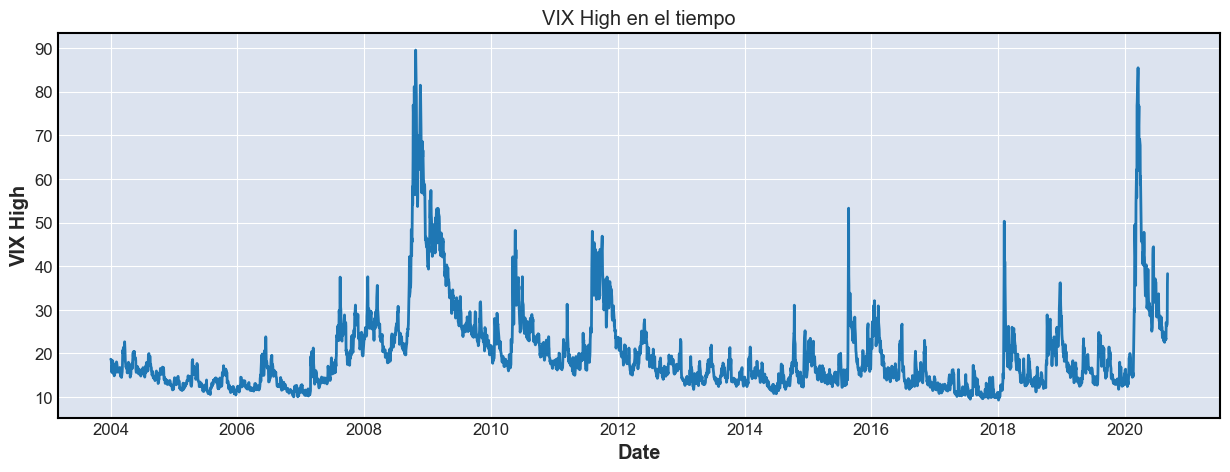

In [37]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = 'Date', y = 'VIX High', data = vix)
plt.title('VIX High en el tiempo')
plt.show()

In [38]:
'Seteo índice como fecha y renombro para poder trabajar con la librería de finance'

vix.set_index('Date', inplace = True)
vix.rename(columns = {'VIX Open': 'Open', 'VIX High' : 'High', 'VIX Low': 'Low', 'VIX Close': 'Close'}, inplace= True)

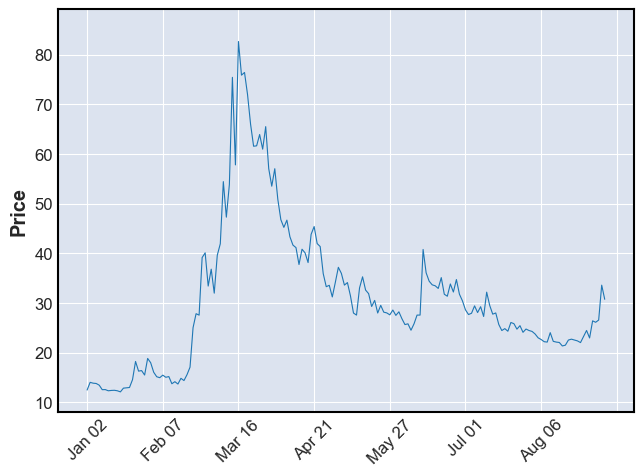

In [39]:
'Graficamos el índice vix para el año 2020, observando el pico en plena pandemia'

vix_2020 = vix[vix.index.year == 2020]
mpf.plot(vix_2020, type = 'line')

In [40]:
'Observamos los picos de 2008 y 2020'

fig = go.Figure()

fig.add_trace(go.Candlestick(x=vix.index, # x=msft.index.strftime("%y/%m/%d") # para evitar trazar los dias sin dato
                            open=vix.Open,
                            high=vix.High,
                            low=vix.Low,
                            close=vix.Close,
                            increasing_line_color = 'cyan',
                            decreasing_line_color = 'gray'))
fig.update_layout(xaxis_rangeslider_visible=False) #para ocultar la barra de abajo
fig.show()

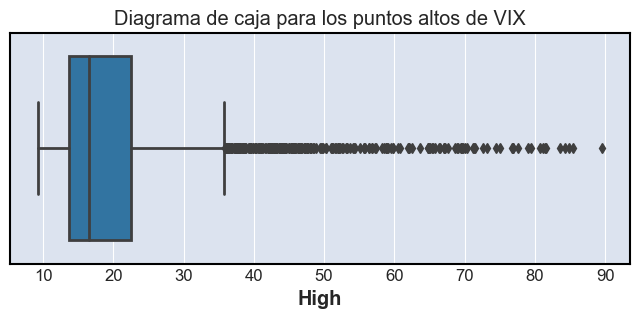

In [41]:
plt.figure(figsize=(8, 3))
sns.boxplot(x = 'High' , data= vix)
plt.title('Diagrama de caja para los puntos altos de VIX')
plt.show()

*Podemos determinar que los momentos de mayor volatilidad han sido en 2008 y 2020. Esto responde a dos grandes crisis. La primera, a la crisis financiera originada en las hipotecas subprime. La segunda, a la pandemia del COVID*

### *5) ¿Cuáles son las 9 mejores empresas para invertir?*

**Para poder realizar una recomendación actualizada, trabajamos con el dataset que contiene datos hasta el 28-06-2022**

In [42]:
df_2022 = pd.read_parquet('data_2022')

In [43]:
df_2022['Date'] = df_2022.index
df_2022.reset_index(drop = True, inplace = True)
df_2022.rename(columns = {'ticker':'Symbol'}, inplace = True)
df_2022 = industrias[['Symbol', 'GICS Sector', 'GICS Sub-Industry']].merge(df_2022, how='inner', on='Symbol')

In [44]:
df_2022

,Symbol,GICS Sector,GICS Sub-Industry,Open,High,Low,Close,Adj Close,Volume,Date
0,MMM,Industrials,Industrial Conglomerates,177.679993,180.009995,177.139999,180.000000,164.922287,3601700.0,2020-01-02
1,MMM,Industrials,Industrial Conglomerates,177.020004,178.660004,175.630005,178.449997,163.502136,2466900.0,2020-01-03
2,MMM,Industrials,Industrial Conglomerates,177.149994,178.710007,176.350006,178.619995,163.657898,1998000.0,2020-01-06
3,MMM,Industrials,Industrial Conglomerates,178.279999,178.509995,176.820007,177.899994,162.998184,2173000.0,2020-01-07
4,MMM,Industrials,Industrial Conglomerates,178.000000,181.500000,177.649994,180.630005,165.499542,2758300.0,2020-01-08
...,...,...,...,...,...,...,...,...,...,...
312041,ZTS,Health Care,Pharmaceuticals,160.270004,162.770004,160.160004,162.009995,162.009995,2080200.0,2022-06-21
312042,ZTS,Health Care,Pharmaceuticals,161.179993,166.270004,161.089996,164.210007,164.210007,2137700.0,2022-06-22
312043,ZTS,Health Care,Pharmaceuticals,166.020004,169.380005,165.589996,169.169998,169.169998,1535600.0,2022-06-23
312044,ZTS,Health Care,Pharmaceuticals,172.000000,174.679993,171.389999,174.610001,174.610001,3255000.0,2022-06-24


## Recomendamos una cartera de inversiones diversificada según distintos criterios

### <font color='green'> **Compañías que otorgan mayores dividendos**</font> 

+ *AT&T*

 Es un proveedor diversificado de servicios de medios y entretenimiento, telecomunicaciones y tecnología

In [45]:
t = yf.Ticker('T')

In [46]:
t_dividends = t.dividends
t_dividends = t_dividends.resample('Y').sum()
t_dividends = t_dividends.reset_index()
t_dividends['Date'] = t_dividends['Date'].dt.year

*IMPORTANTE: los dividendos de 2022 incluyen solo los del primer semestre*

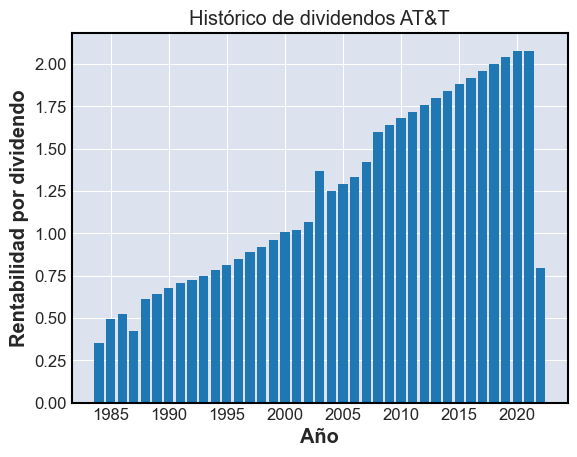

In [47]:
plt.figure()
plt.bar(t_dividends['Date'], t_dividends['Dividends'])
plt.ylabel('Rentabilidad por dividendo')
plt.xlabel('Año')
plt.title('Histórico de dividendos AT&T')
plt.show()

+ *IBM*

In [48]:
ibm = yf.Ticker('IBM')

In [49]:
ibm_dividends = ibm.dividends
ibm_dividends = ibm_dividends.resample('Y').sum()
ibm_dividends = ibm_dividends.reset_index()
ibm_dividends['Date'] = ibm_dividends['Date'].dt.year

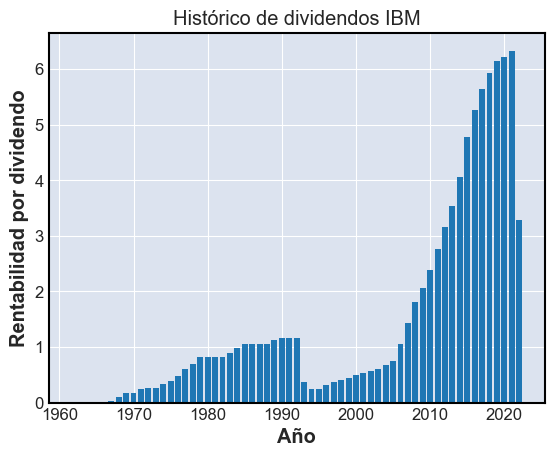

In [50]:
plt.figure()
plt.bar(ibm_dividends['Date'], ibm_dividends['Dividends'])
plt.ylabel('Rentabilidad por dividendo')
plt.xlabel('Año')
plt.title('Histórico de dividendos IBM')
plt.show()

+ *Chevron*

In [51]:
cvx = yf.Ticker('CVX')

In [52]:
cvx_dividends = cvx.dividends
cvx_dividends = cvx_dividends.resample('Y').sum()
cvx_dividends = cvx_dividends.reset_index()
cvx_dividends['Date'] = cvx_dividends['Date'].dt.year

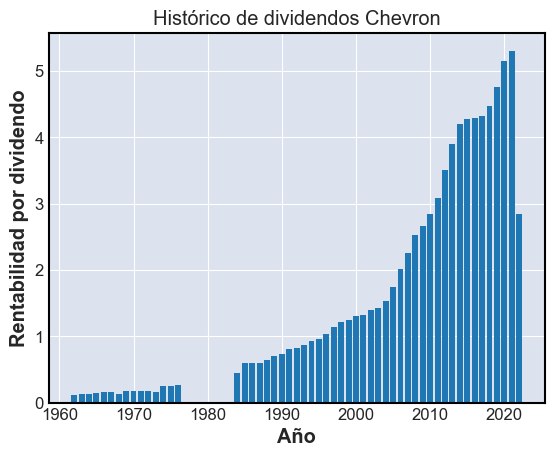

In [53]:
plt.figure()
plt.bar(cvx_dividends['Date'], cvx_dividends['Dividends'])
plt.ylabel('Rentabilidad por dividendo')
plt.xlabel('Año')
plt.title('Histórico de dividendos Chevron')
plt.show()

### <font color='green'> **Compañía por ciclo alcista**</font> 

+ *3 M*

In [50]:
mmm = yf.download('MMM', start='2020-01-01', end = '2022-06-28')


[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date', ylabel='Close'>

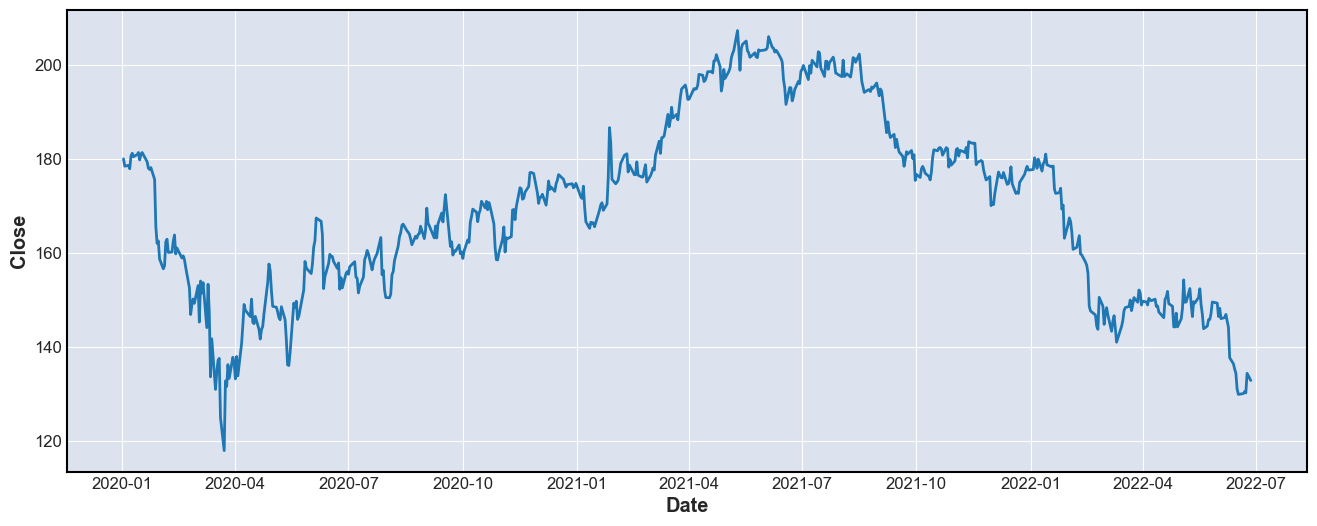

In [58]:
plt.figure(figsize=(16, 6))

sns.lineplot(x = 'Date', y = 'Close', data = mmm)

In [59]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=mmm.index, 
                         y=mmm.Close,
                         name="Price",
                         fill = 'tozeroy'))
fig.update_layout(showlegend = True, 
                  title = go.layout.Title(
                        text="Close Price MMM",
                        xref="paper", 
                        x=0.5, 
                        font = dict(
                        size=18,
                        )),
                  xaxis = go.layout.XAxis(
                    title = go.layout.xaxis.Title(text="Date")
                  ),
                  yaxis = go.layout.YAxis(
                    title = go.layout.yaxis.Title(
                        text="Close Price")))

In [61]:
fig = go.Figure()

fig.add_trace(go.Candlestick(x=mmm.index, # x=msft.index.strftime("%y/%m/%d") # para evitar trazar los dias sin dato
                            open=mmm.Open,
                            high=mmm.High,
                            low=mmm.Low,
                            close=mmm.Close,
                            increasing_line_color = 'cyan',
                            decreasing_line_color = 'gray'))
fig.update_layout(xaxis_rangeslider_visible=False) #para ocultar la barra de abajo
fig.show()

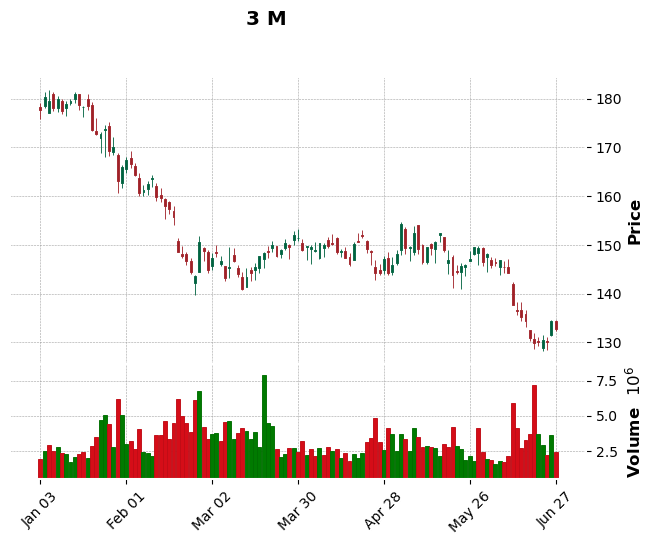

In [53]:
mpf.plot(mmm[mmm.index.year == 2022], type = 'candle', style = 'charles', ylabel = 'Price', title = '3 M', volume = True)

### <font color='green'> **Compañías por el método de mínimos históricos**</font> 

In [72]:
low_min = df_2022.groupby('Symbol').Low.min()

In [73]:
low_min.sort_values(ascending= True).head(20)

Symbol
MRO     3.020000
PENN    3.750000
APA     3.800000
F       3.960000
HAL     4.250000
DVN     4.700000
FCX     4.820000
AMCR    5.800000
MGM     5.900000
CZR     6.020000
IVZ     6.380000
BBWI    6.467259
MOS     6.500000
HBAN    6.820000
RF      6.940000
NCLH    7.030000
HPE     7.430000
KIM     7.450000
KEY     7.450000
CCL     7.800000
Name: Low, dtype: float64

+ *Penn National Gaming*

In [74]:
penn = yf.download('PENN', start='2020-01-01', end = '2022-06-28')

[*********************100%***********************]  1 of 1 completed


In [75]:
fig = go.Figure()

fig.add_trace(go.Candlestick(x=penn.index, # x=msft.index.strftime("%y/%m/%d") # para evitar trazar los dias sin dato
                            open=penn.Open,
                            high=penn.High,
                            low=penn.Low,
                            close=penn.Close,
                            increasing_line_color = 'cyan',
                            decreasing_line_color = 'gray'))
fig.update_layout(xaxis_rangeslider_visible=False) #para ocultar la barra de abajo
fig.show()

+ *Norwegian Cruise Line Holdings*

In [76]:
nclh = yf.download('NCLH', start='2020-01-01', end = '2022-06-28')

[*********************100%***********************]  1 of 1 completed


In [77]:
fig = go.Figure()

fig.add_trace(go.Candlestick(x=nclh.index, # x=msft.index.strftime("%y/%m/%d") # para evitar trazar los dias sin dato
                            open=nclh.Open,
                            high=nclh.High,
                            low=nclh.Low,
                            close=nclh.Close,
                            increasing_line_color = 'cyan',
                            decreasing_line_color = 'gray'))
fig.update_layout(xaxis_rangeslider_visible=False) #para ocultar la barra de abajo
fig.show()

### <font color='green'> **Compañía por el método de la volatilidad**</font> 

+ *AEE*

In [54]:
df_2022['variaciones'] = df_2022['Adj Close'].pct_change()
df_2022['volatilidad'] = (df_2022.variaciones.rolling(30).std()*(30)**0.5) * 100

In [55]:
df_2022[df_2022.volatilidad < 3].groupby('Symbol').mean()

,Open,High,Low,Close,Adj Close,Volume,variaciones,volatilidad
Symbol,,,,,,,,
AEE,86.337502,86.707500,85.792500,86.270000,80.848583,1.914425e+06,-0.000231,2.724609
ATVI,79.474483,79.852068,79.157586,79.419655,79.125690,5.730014e+06,-0.001238,2.754045
CTXS,101.023555,101.276222,100.620667,100.992444,100.992444,1.311196e+06,0.000073,2.004151
FE,46.845000,47.093750,46.461250,46.828750,44.036514,3.858025e+06,-0.000451,2.833884
ICE,120.123334,120.276665,118.840001,119.426666,117.993825,1.596600e+06,-0.003564,2.913291
MDLZ,63.860001,63.919998,63.509998,63.660000,62.285301,6.101000e+06,-0.002038,2.997889
PPL,29.569375,29.776250,29.336875,29.560000,29.078698,4.747300e+06,-0.000743,2.650788
RSG,100.046666,100.676669,99.606664,100.246666,96.516276,1.096233e+06,0.003485,2.809480
VZ,55.202273,55.456666,54.990758,55.176818,53.204743,1.502666e+07,-0.000393,2.688003


In [56]:
aee = df_2022[df_2022['Symbol'] == 'AEE']
aee.set_index('Date', inplace = True)
aee_volatilidad = aee.resample('M').mean()

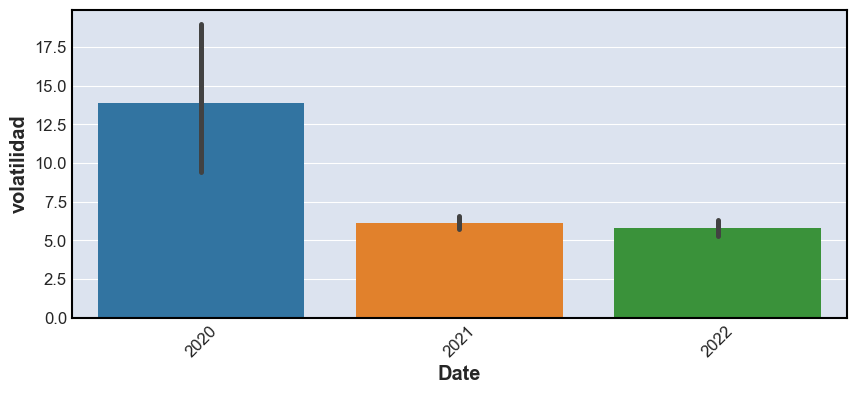

In [57]:
'Observamos la volatilidad para los últimos 3 años'

plt.figure(figsize= (10,4))
sns.barplot(x = aee_volatilidad.index.year, y= aee_volatilidad.volatilidad)
plt.xticks(rotation = 45)
plt.show()

In [58]:
aee_volatilidad['Date'] = aee_volatilidad.index
aee_volatilidad['Date'] = aee_volatilidad['Date'].dt.date
aee_volatilidad.reset_index(drop= True, inplace = True)

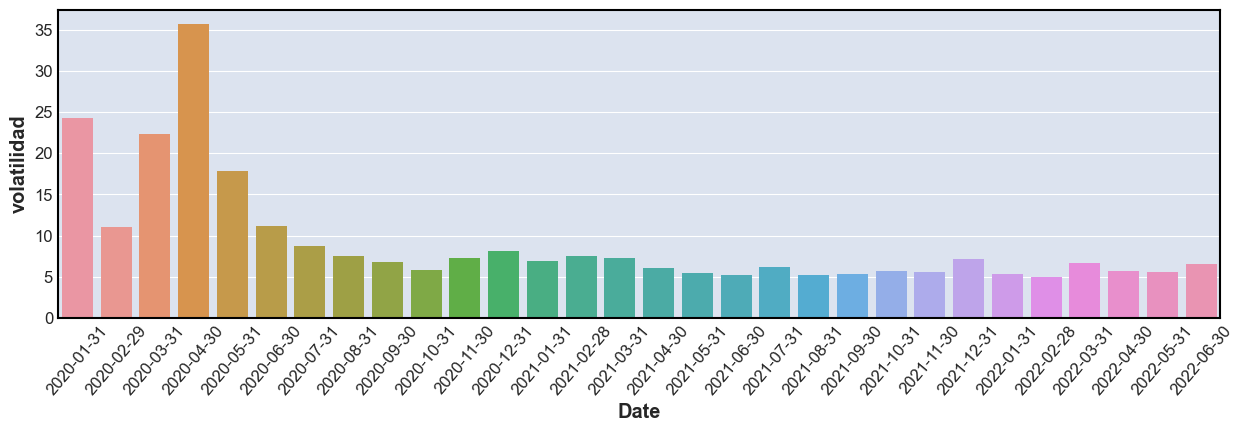

In [59]:
plt.figure(figsize= (15,4))
sns.barplot(x = aee_volatilidad.Date, y= aee_volatilidad.volatilidad)
plt.xticks(rotation = 50)
plt.show()

### <font color='green'> **Compañías por el método de los retornos intradiarios**</font> 

Para inversiones a corto plazo, basándonos en aquellas que han reportado una mayor ganancia diaria en el 2022:

+ *ENPH*
+ *NLSN*
+ *SEDG*

In [60]:
df_2022['retornos_intra'] = np.log(df_2022['Close']/df_2022['Open']).fillna(0)
df_2022.set_index('Date', inplace = True)
df_2022_retorno = df_2022[df_2022.index.year == 2022]

In [61]:
df_2022_retorno[df_2022_retorno.retornos_intra > 0.19]

,Symbol,GICS Sector,GICS Sub-Industry,Open,High,Low,Close,Adj Close,Volume,variaciones,volatilidad,retornos_intra
Date,,,,,,,,,,,,
2022-02-24,ENPH,Information Technology,Electronic Components,119.000000,147.929993,118.570000,147.350006,147.350006,5034800.0,0.164270,31.935802,0.213687
2022-03-14,NLSN,Industrials,Research & Consulting Services,17.670000,25.780001,17.059999,22.850000,22.796362,39616300.0,0.304969,33.199547,0.257083
2022-02-24,SEDG,Information Technology,Semiconductor Equipment,223.429993,271.660004,220.029999,271.190002,271.190002,1351300.0,0.148575,26.444244,0.193722
